# Kinase data preprocessing

This notebook performs the following preprocessing tasks:

1. Set path to KLIFS download files
2. Load, merge and filter KLIFS download files
3. Analyse gap rate of KLIFS dataset
4. Download PDB files for KLIFS dataset

In [16]:
import os.path
from pathlib import Path
import sys

from Bio.PDB import PDBList
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.extend(['./..'])
from kinsim_structure.preprocessing import *

%matplotlib inline

### 1. Set path to KLIFS download files

In [21]:
# Path to data directory
dataset_name = '20190724_full'

path_to_data = Path('/') / 'home' / 'dominique' / 'Documents' / 'data' / 'kinsim' / dataset_name
path_to_results = Path('..') / 'results' / dataset_name
path_to_results.mkdir(parents=True, exist_ok=True)

### 2. Load, merge and filter KLIFS download files

In [12]:
klifs_overview_file = path_to_data / 'raw' / 'KLIFS_download' /'overview.csv'
klifs_export_file = path_to_data / 'raw'/ 'KLIFS_export.csv'

klifs_data = get_klifs_data_from_files(klifs_overview_file, klifs_export_file)
klifs_data_filtered = filter_klifs_data(klifs_data)

In [13]:
# Check if there are PDB IDs occurring multiple times for one kinase
grouped = klifs_data_filtered.groupby("pdb_id")["kinase"].size()
multiple_pdb_ids = list(grouped[grouped > 1].index)
klifs_data_filtered.loc[klifs_data_filtered.pdb_id.isin(multiple_pdb_ids)].sort_values('pdb_id')

,index,kinase,family,groups,pdb_id,chain,alternate_model,species,ligand_orthosteric_name,ligand_orthosteric_pdb_id,...,dfg,ac_helix,rmsd1,rmsd2,qualityscore,pocket,resolution,missing_residues,missing_atoms,full_ifp
2880,1013,MAPKAPK2,MAPKAPK,CAMK,2onl,C,-,Human,-,-,...,in,in,0.798,2.852,8.0,NAIIDDYKVKVLQFALKMLKARREVELHWRASPHIVRIVDVLIVME...,4.00,0,8,NaN
4303,3825,p38a,MAPK,CMGC,2onl,B,-,Human,-,-,...,in,out-like,0.822,2.133,9.0,SPVGSGAYGSVCAVAVKKLRTYRELRLLKHMKENVIGLLDVYLVTH...,4.00,0,10,NaN
2775,1436,LKB1,CAMKL,CAMK,2wtk,C,-,Human,PHOSPHOAMINOPHOSPHONIC ACID-ADENYLATE ESTER,ANP,...,na,na,0.780,2.107,8.0,DLLGEGSYGKVKERAVKILNVKKEIQLLRRLRKNVIQLVDVYMVME...,2.65,0,0,0000000000000010000001000000100000000001000000...
3737,2621,STLK5,STE20,STE,2wtk,E,-,Human,PHOSPHOAMINOPHOSPHONIC ACID-ADENYLATE ESTER,ANP,...,na,na,0.791,2.155,8.0,TVIGKGFEDLMTVVTVRRIFLQGELHVSKLFNPNIVPYRATWVVTS...,2.65,0,0,0000000000000010000001000000100000000000000001...
403,2363,BRAF,RAF,TKL,4mne,B,B,Human,-,-,...,in,in,0.796,1.986,6.4,QRIG____GTVYKVAVKMLAFKNEVGVLRKTRVNILLFMGYAIVTQ...,2.85,4,0,NaN
2824,2555,MAP2K1,STE7,STE,4mne,H,B,Human,PHOSPHOMETHYLPHOSPHONIC ACID ADENYLATE ESTER,ACP,...,in,out,0.833,2.218,8.0,SELGAGNGGVVFKMARKLIQIIRELQVLHECNPYIVGFYGASICME...,2.85,0,0,0000000000000010000001000000100000010000001001...
1914,1950,Erk2,MAPK,CMGC,4nif,B,B,Human,PHOSPHOAMINOPHOSPHONIC ACID-ADENYLATE ESTER,ANP,...,in,in,0.784,2.095,8.0,SYIGEGAYGMVCSVAIKKIRTLREIKILLRFRENIIGINDIYIVQD...,2.15,0,0,0000000000000010000001000000100000010000000001...
3687,4272,RSK1-b,RSKb,CAMK,4nif,D,A,Human,-,-,...,in,in,0.785,2.114,9.6,ETIGVGSYSECKRYAVKVIDPSEEIEILLRYGPNIITLKDVYLVTE...,2.15,0,4,NaN
1688,678,EGFR,EGFR,TK,4riw,D,-,Human,ADENOSINE-5'-DIPHOSPHATE,ADP,...,in,in,0.787,2.091,8.0,KVLGSGAFGTVYKVAIKELEILDEAYVMASVDPHVCRLLGIQLITQ...,3.10,0,0,0000000000000010000000000000000000000000000000...
1871,1491,ErbB3,EGFR,TK,4riw,C,-,Human,PHOSPHOAMINOPHOSPHONIC ACID-ADENYLATE ESTER,ANP,...,in,out,0.840,2.205,8.0,KVLGSGVFGTVHKVCIKVIAVTDHMLAIGSLDAHIVRLLGLQLVTQ...,3.10,0,0,0000000000000010000001000000100000000000000001...


In [14]:
# Save filtered dataset
klifs_data_filtered.to_csv(path_to_data / 'preprocessed' / 'klifs_data_preprocessed.csv')

### 3. Analyse gap rate of KLIFS dataset

In [15]:
gap_rate = calculate_gap_rate(klifs_data)

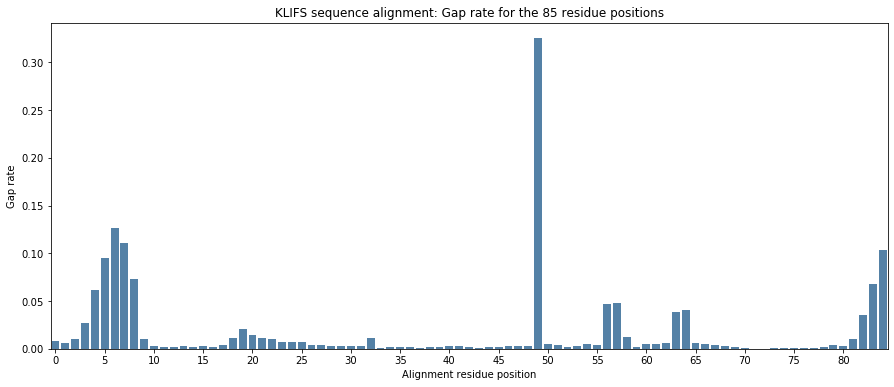

In [17]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x='klifs_position', 
                 y='gap_rate', 
                 data=gap_rate,
                 color='steelblue')
ax.set_title('KLIFS sequence alignment: Gap rate for the 85 residue positions')
ax.set_xlabel('Alignment residue position')
ax.set_ylabel('Gap rate')
ax.xaxis.set_ticks(np.arange(0,85,5));
ax.set_xticklabels(np.arange(0,85,5));

In [22]:
plt.savefig(path_to_results / 'plot_gap_rate.png', dpi=300)

<Figure size 432x288 with 0 Axes>

### 4. Download PDB files for KLIFS dataset

In [ ]:
download_from_pdb(klifs_data, path_to_data / 'raw' / 'PDB_download')

Desired structure doesn't exists
Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3dko.cif' 
Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2rei.cif' 
Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3miy.cif' 
Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ppc.cif' 
Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3qgy.cif' 
Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4l7s.cif' 
Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1snu.cif' 
Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4kio.cif' 
Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4m12.cif' 
Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/P

Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2ijm.cif' 
Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4mh7.cif' 
Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2etm.cif' 


Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ebw.cif' 
Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2ijm.cif' 


Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ebv.cif' 


Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2hak.cif' 
Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2hak.cif' 
Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4k9y.cif' 


Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5v24.cif' 
Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5v24.cif' 


Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4mha.cif' 


Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4kik.cif' 
Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3brb.cif' 
Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4kik.cif' 
Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4kik.cif' 


Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4mha.cif' 


Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4e3c.cif' 
Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2xnn.cif' 


Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4e3c.cif' 


Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4m3q.cif' 
Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4e3c.cif' 
Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4mha.cif' 
Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4e3c.cif' 
Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4e3c.cif' 
Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3bpr.cif' 


Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3brb.cif' 


Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3bpr.cif' 


Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2xkc.cif' 
Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2w5b.cif' 
Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2xk3.cif' 


Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2xk7.cif' 


Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2jav.cif' 


Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2yn8.cif' 


Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2xnm.cif' 


Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2xkd.cif' 
Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4o38.cif' 


Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4y8d.cif' 
Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2xk4.cif' 
Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4o38.cif' 
Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2xk4.cif' 
Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4o38.cif' 
Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4y8d.cif' 


Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5m4f.cif' 


Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5eta.cif' 


Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2vwx.cif' 
Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2vwz.cif' 


Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3zew.cif' 


Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3zew.cif' 


Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ic8.cif' 
Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2vx1.cif' 
Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2vx0.cif' 


Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2j90.cif' 
Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1yrp.cif' 
Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3bqr.cif' 


Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4aw5.cif' 


Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2vwy.cif' 
Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2vww.cif' 


Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5m55.cif' 


Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4u0i.cif' 


Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1t46.cif' 


Structure exists: '/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1pkg.cif' 
